#### This notebook contains all breakdowns of the mass shooting data (2014-2018)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('CleanDatasets/mass_shooting_full_data.csv')
data.head()

,Incident Date,State,City Or County,Address,# Killed,# Injured,Year
0,2014-12-29,Louisiana,New Orleans,Poydras and Bolivar,0,4,2014
1,2014-12-27,California,Los Angeles,8800 block of South Figueroa Street,1,3,2014
2,2014-12-27,California,Sacramento,4000 block of May Street,0,4,2014
3,2014-12-26,Illinois,East St. Louis,2500 block of Summit Avenue,1,3,2014
4,2014-12-24,Missouri,Saint Louis,18th and Pine,1,3,2014


In [3]:
# creating a state grouping of mass shootings by year
state_year_group = data[['State','# Killed','# Injured','Year']]
state_year_group = state_year_group.groupby(['State','Year']).sum()
# state_year_group = state_year_group.reset_index()
# state_year_group = state_year_group.set_index('State')
state_year_group.head()

# Killed  # Injured
State   Year                     
Alabama 2014         1          9
        2015         4         13
        2016        16         53
        2017         6         38
        2018        12         55

In [4]:
# creating a grouping by state for the entire time period (2014-2018)
state_group = data[['State','# Killed','# Injured',]]
state_group = state_group.groupby(['State']).sum()
# state_group = state_group.reset_index()
state_group.head()

,# Killed,# Injured
State,,
Alabama,39,168
Alaska,0,6
Arizona,37,52
Arkansas,18,85
California,199,763


''

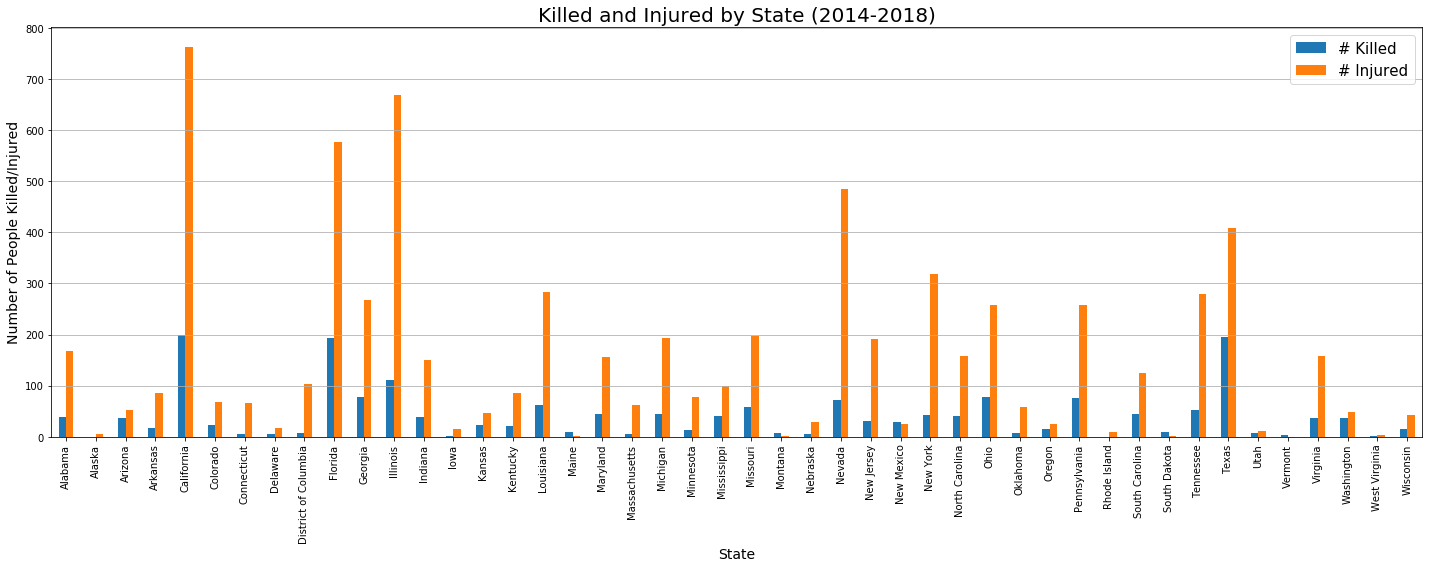

In [5]:
state_group.plot.bar(figsize=(20,8))
plt.title('Killed and Injured by State (2014-2018)', fontsize=20)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of People Killed/Injured', fontsize=14)
plt.grid(axis='y')
plt.legend(fontsize=15)
plt.tight_layout()
plt.savefig('Figures/Mass_Shootings_Figures/killed_injured_by_state_all.png')
;

In [28]:
top_5_states = state_group.sort_values('# Killed', ascending=False)
top_5_states = top_5_states.head()
top_5_states

,# Killed,# Injured
State,,
California,199,763
Texas,196,409
Florida,194,576
Illinois,111,668
Georgia,78,267


''

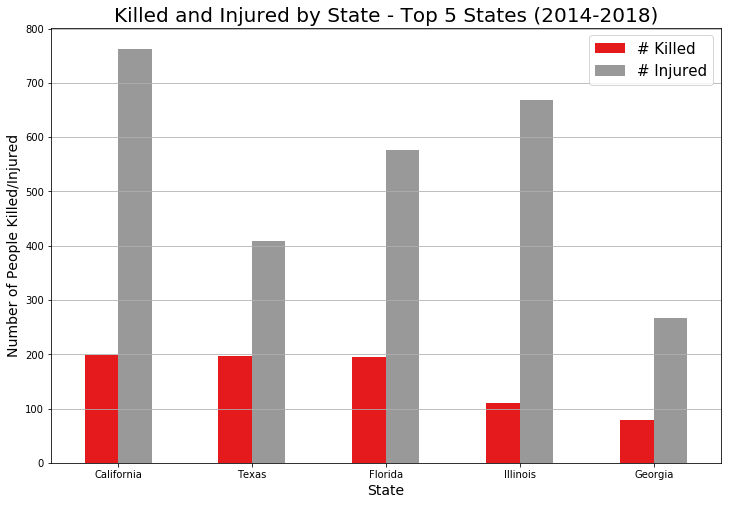

In [63]:
top_5_states.plot.bar(figsize=(12,8), colormap='Set1')
plt.title('Killed and Injured by State - Top 5 States (2014-2018)', fontsize=20)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of People Killed/Injured', fontsize=14)
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(fontsize=15)
plt.savefig('Figures/Mass_Shootings_Figures/killed_injured_top5_states.png')
;

In [50]:
bottom_5_states = state_group.sort_values('# Killed')
bottom_5_states = bottom_5_states.head()
bottom_5_states

,# Killed,# Injured
State,,
Rhode Island,0,9
Alaska,0,6
West Virginia,1,3
Iowa,2,16
Vermont,4,0


''

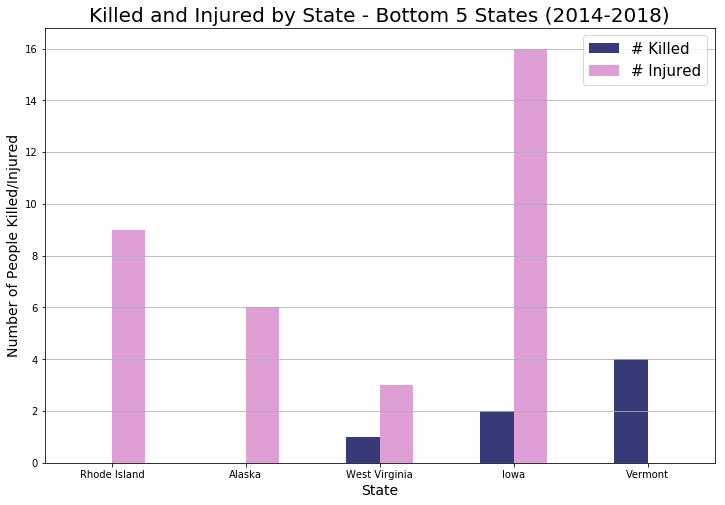

In [64]:
bottom_5_states.plot.bar(figsize=(12,8), colormap='tab20b')
plt.title('Killed and Injured by State - Bottom 5 States (2014-2018)', fontsize=20)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of People Killed/Injured', fontsize=14)
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(fontsize=15)
plt.savefig('Figures/Mass_Shootings_Figures/killed_injured_bottom5_states.png')
;

In [5]:
# creating a year grouping of mass shootings
year_group = data[['# Killed','# Injured','Year']]
year_group = year_group.groupby(['Year']).sum()
# year_group = year_group.reset_index()
year_group.head()

,# Killed,# Injured
Year,,
2014,262,1078
2015,368,1337
2016,451,1538
2017,437,1803
2018,373,1347


In [6]:
# it would be good for us to use an API to get lat/lon coordinates for each city/county and use those to
# geoplot mass shooting with a bubble map or heat map or another good visualization method

''

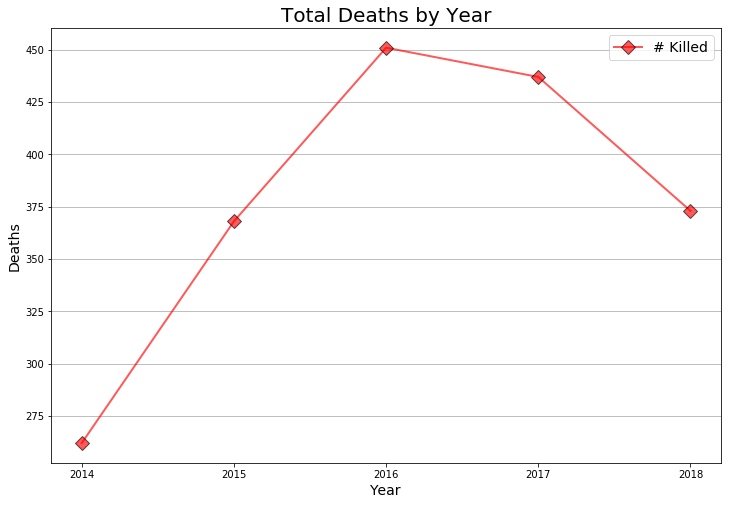

In [65]:
xticks = (2014,2015,2016,2017,2018)

year_group.plot.line(figsize=(12,8), xticks=xticks, y='# Killed', color='red',
                     marker='D', alpha=.65, markersize=10, markeredgecolor='black', linewidth=2)
plt.grid(axis='y')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Deaths', fontsize=14)
plt.title('Total Deaths by Year', fontsize=20)
plt.legend(fontsize=14)
plt.savefig('Figures/Mass_Shootings_Figures/total_deaths_by_year.png')
;